# Training a Neural Network in Tensorflow

##### 1. Install TensorFlow

In [20]:
#%pip install tensorflow
#%pip install keras

In [2]:
import tensorflow as tf
from tensorflow import keras

##### 2. Fashion Dataset

```
Training set of 60,000 examples
Test set of 10,000 examples

Each example is a 28x28 grayscale image
    associated with a label from 10 classes
        | Label | Description |
        |-------|-------------|
        | 0     | T-shirt/top |
        | 1     | Trouser     |
        | 2     | Pullover    |
        | 3     | Dress       |
        | 4     | Coat        |
        | 5     | Sandal      |
        | 6     | Shirt       |
        | 7     | Sneaker     |
        | 8     | Bag         |
        | 9     | Ankle boot  |
```

More information on dataset: https://github.com/zalandoresearch/fashion-mnist

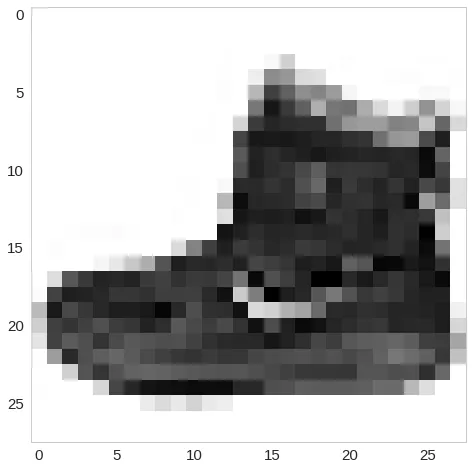

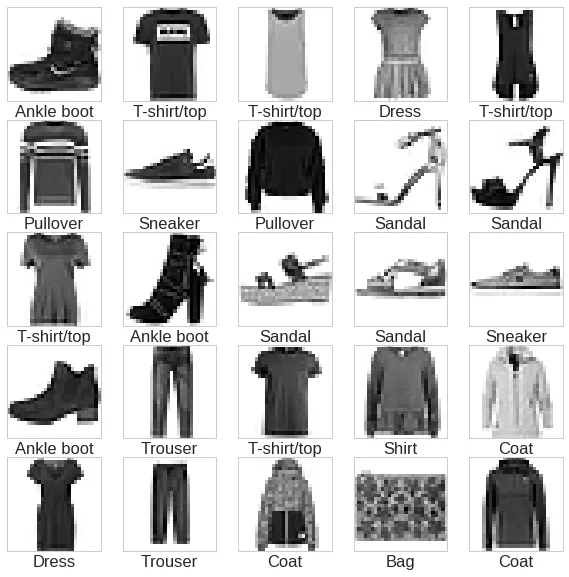

In [3]:
(x_train, y_train), (x_val, y_val) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


##### 3. Data Processing

```
Loading Data

TensorFlow has the dataset built-in for easy access

Four components are loaded:
    x_train: Image data for 60,000 clothes for model building.
    y_train: Classes (clothing type) for the clothing above for model building.
    x_val: Image data for 10,000 clothes for model testing/validation.
    y_val: Classes (clothing type) for the clothing above for model testing/validation.


Data Transformation
    Neural Networks understand numbers
        Not images
    Each data point of each image in our dataset is pixel data
        A number between 0 and 255 

    Data is transformed to be in the range 0–1 to help with training a better model


Preparing Data with TensorFlows Dataset

    tf.one_hot is used to one-hot encode the classes
        It puts 1 at the index position of the number and 0 everywhere else

    Dataset is created from the data using from_tensor_slices
    Each pixel of the images is divided by 255 to scale it in the 0–1 range
        Normalised

    Shuffle and batch are used to convert the data into chunks
        Shuffled to prevent the model from making predictions based on the order of the training data
```

##### What is One Hot Encoding?

Let’s say you have the following vector:

```
[1, 2, 3, 1]
```

Here is the one-hot encoded version of it:

```
[
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0]
]
```
It puts 1 at the index position of the number and 0 everywhere else.

In [4]:
def preprocess(x, y):
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.cast(y, tf.int64)

  return x, y

def create_dataset(xs, ys, n_classes=10):
  ys = tf.one_hot(ys, depth=n_classes)
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocess) \
    .shuffle(len(ys)) \
    .batch(128)

In [5]:
train_dataset = create_dataset(x_train, y_train)
val_dataset = create_dataset(x_val, y_val)

##### 4. Create Neural Network

```
Neural Network Structure
    Built by “stacking” layers
        Think pancakes or lasagna

    The first network has 5 layers


Input Layer (Reshape)
    Converts the input data for the layers below
    Images are 28*28=784 pixels
        The 2D 28x28 array is converted to a 1D 784 array


Dense Layers
    All other layers are Dense
        Interconnected
    Units parameter sets the number of neurons for each layer
    Activation parameter specifies a function
        Decides whether a neurons 'opinion' should be taken into account and to what degree

Output Layer
    A layer with 10 neurons
        10 different types of clothing in the data
            Classes/Labels
    Predictions are obtained from this layer
```

In [6]:
model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=192, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

C:\Users\LucyKnight\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##### Train The Network

```
Neural Network Training
    Involves deciding on an objective measurement of accuracy and an algorithm for improvement

TensorFlow Specifications
    Specification of the optimiser algorithm
        Adam
    Specification of the measurement (loss function)
        CategoricalCrossentropy
            For classifying 10 different types of clothing
        Measures the accuracy of the model during training

Model Training
    Training occurs when the 'fit' method is called
    Training and validation data are provided to the fit method
    The number of epochs for training is specified
        How many times to run the model
    During one training epoch, all data is shown to the model
```

In [7]:
model.compile(optimizer='adam', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_dataset.repeat(), 
    epochs=10, 
    steps_per_epoch=500,
    validation_data=val_dataset.repeat(), 
    validation_steps=2
)

Epoch 1/10


C:\Users\LucyKnight\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\nn.py:560: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7616 - loss: 0.6861 - val_accuracy: 0.8359 - val_loss: 0.4219
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8662 - loss: 0.3680 - val_accuracy: 0.8398 - val_loss: 0.4251
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8790 - loss: 0.3277 - val_accuracy: 0.8633 - val_loss: 0.3683
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8852 - loss: 0.3054 - val_accuracy: 0.8711 - val_loss: 0.3247
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8967 - loss: 0.2802 - val_accuracy: 0.8750 - val_loss: 0.3587
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8983 - loss: 0.2680 - val_accuracy: 0.8789 - val_loss: 0.3600
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9017 - loss: 0.2576 - val_accuracy: 0.9258 - val_loss: 0.2585
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9056 - loss: 0.2473 - val_accuracy: 0.8906 - val_

##### Show Model Accuracy and Loss

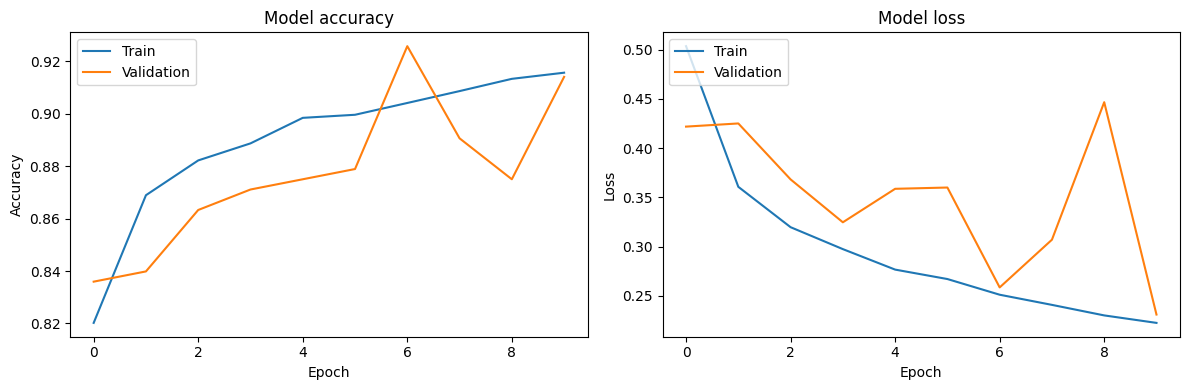

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


#### 5. Prediction

In [9]:
import numpy as np

predictions = model.predict(val_dataset)



79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


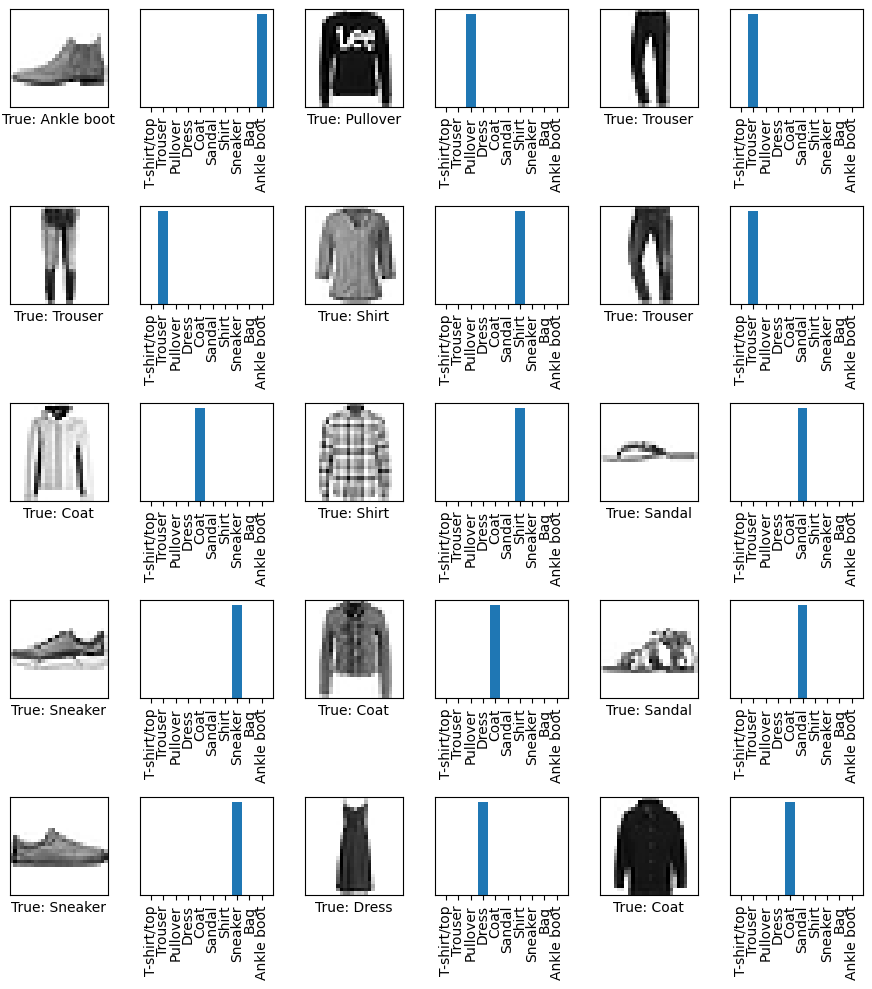

In [10]:
import numpy as np

# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

# Make predictions
x_val_predictions = model.predict(x_val)

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(x_val_predictions, axis=1) 

# y_val is already an array of class labels
y_true = y_val

plt.figure(figsize=(3*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plt.imshow(x_val[i].reshape(28,28), cmap=plt.cm.binary)
  plt.xlabel("True: " + class_names[y_true[i]])
  plt.xticks([])
  plt.yticks([])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plt.bar(range(10), x_val_predictions[i])
  plt.xticks(range(10), class_names, rotation=90)
  plt.yticks([])
plt.tight_layout()
plt.show()


# Are all of the above labelled correctly?

```






```

##### Display only incorrectly labelled values

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


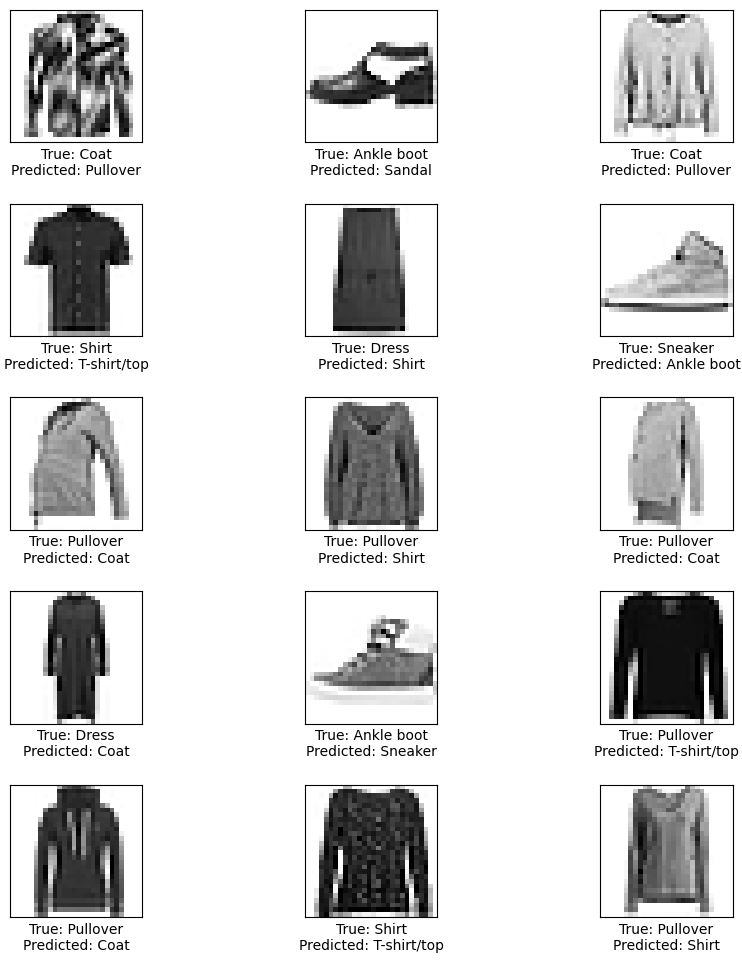

In [11]:
import numpy as np

# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

# Make predictions
x_val_predictions = model.predict(x_val)

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(x_val_predictions, axis=1) 

# y_val is already an array of class labels
y_true = y_val

# Find the incorrectly classified examples
incorrect = y_pred_classes != y_true

# Select the incorrectly classified examples
x_val_incorrect = x_val[incorrect]
y_true_incorrect = y_true[incorrect]
y_pred_classes_incorrect = y_pred_classes[incorrect]

plt.figure(figsize=(3*num_cols, 2*num_rows))  # Increase the width of the figure
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plt.imshow(x_val_incorrect[i].reshape(28,28), cmap=plt.cm.binary)
  plt.xlabel("True: " + class_names[y_true_incorrect[i]] + "\nPredicted: " + class_names[y_pred_classes_incorrect[i]])
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()
plt.show()

##### Show only correctly labelled values

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step


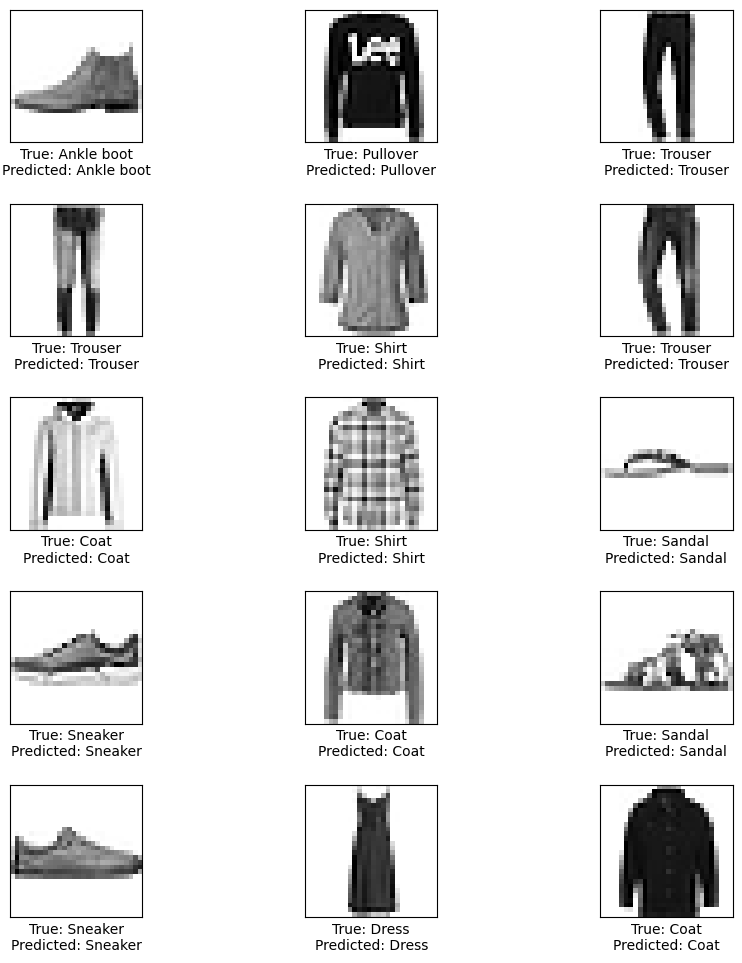

In [12]:
import numpy as np

# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

# Make predictions
x_val_predictions = model.predict(x_val)

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(x_val_predictions, axis=1) 

# y_val is already an array of class labels
y_true = y_val

# Find the correctly classified examples
correct = y_pred_classes == y_true

# Select the correctly classified examples
x_val_correct = x_val[correct]
y_true_correct = y_true[correct]
y_pred_classes_correct = y_pred_classes[correct]

plt.figure(figsize=(3*num_cols, 2*num_rows))  # Increase the width of the figure
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plt.imshow(x_val_correct[i].reshape(28,28), cmap=plt.cm.binary)
  plt.xlabel("True: " + class_names[y_true_correct[i]] + "\nPredicted: " + class_names[y_pred_classes_correct[i]])
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()
plt.show()

##### Confusion Matrix

```
y_val are the true labels for the validation set and y_pred_classes are the predicted labels by the model
```

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


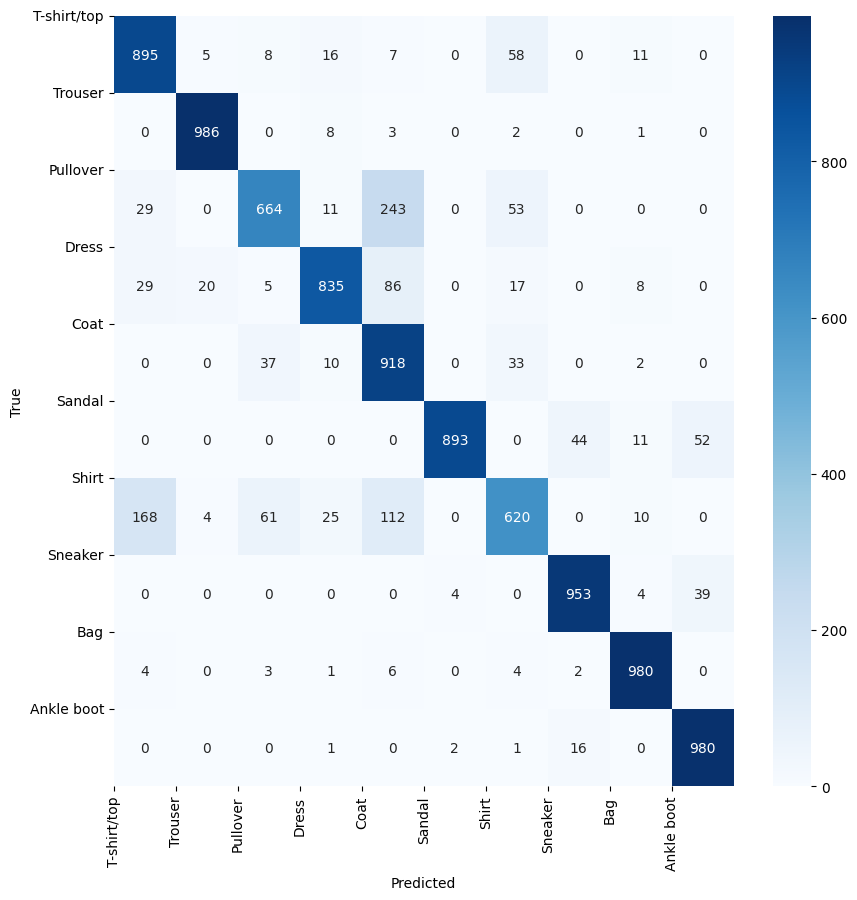

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Make predictions
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(10), labels=class_names, rotation=0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Classification Report

```
classification_report function from sklearn used to compute precision, recall, f1-score and support for each class

Histplot function from seaborn is used to plot a histogram of the predicted probabilities
    Can give an idea about the confidence of the model in its predictions
```

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.90      0.84      1000
     Trouser       0.97      0.99      0.98      1000
    Pullover       0.85      0.66      0.75      1000
       Dress       0.92      0.83      0.88      1000
        Coat       0.67      0.92      0.77      1000
      Sandal       0.99      0.89      0.94      1000
       Shirt       0.79      0.62      0.69      1000
     Sneaker       0.94      0.95      0.95      1000
         Bag       0.95      0.98      0.97      1000
  Ankle boot       0.92      0.98      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



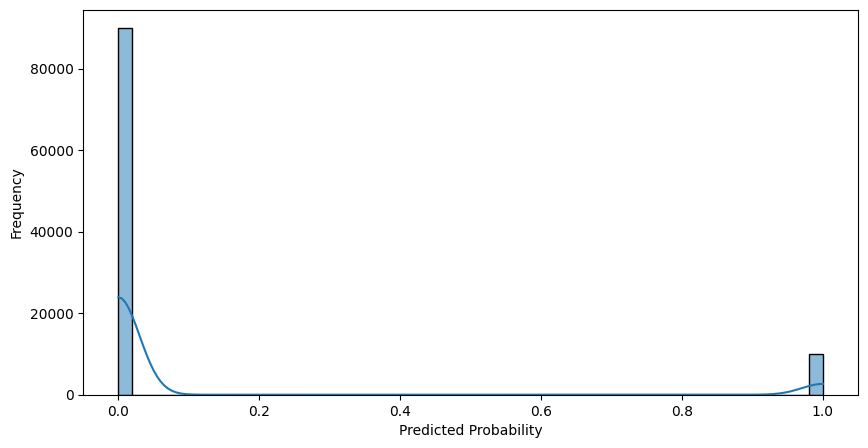

In [16]:
from sklearn.metrics import classification_report
import seaborn as sns

# Make predictions
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_val, y_pred_classes, target_names=class_names))

# Plot a histogram of the predicted probabilities
plt.figure(figsize=(10, 5))
sns.histplot(y_pred.flatten(), bins=50, kde=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


# CNN Version

```
Warning: Can take a while to run on a slower computer.
```

Fashion MNIST dataset is loaded and preprocessed

CNN model is defined with two convolutional layers followed by max pooling layers and a dense layer at the end

The model is compiled with Adam optimizer and Sparse Categorical Crossentropy loss function

The model is trained for 10 epochs

The training and validation accuracy are plotted using Seaborn lineplot

In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Fashion MNIST dataset
(x_train, y_train), (x_val, y_val) = datasets.fashion_mnist.load_data()

# Reshape the images to have an extra dimension for the channels
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

# Normalize pixel values to be between 0 and 1
x_train, x_val = x_train / 255.0, x_val / 255.0

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

C:\Users\LucyKnight\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Train the model
# This step can take some time on a slower device

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7445 - loss: 0.6906 - val_accuracy: 0.8714 - val_loss: 0.3565
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8750 - loss: 0.3378 - val_accuracy: 0.8687 - val_loss: 0.3590
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8956 - loss: 0.2873 - val_accuracy: 0.8922 - val_loss: 0.2972
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9097 - loss: 0.2435 - val_accuracy: 0.8935 - val_loss: 0.2944
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9179 - loss: 0.2216 - val_accuracy: 0.8938 - val_loss: 0.2925
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9252 - loss: 0.2018 - val_accuracy: 0.9041 - val_loss: 0.2670
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9336 - loss: 0.1792 - val_accuracy: 0.9042 - val_loss: 0.2754
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9367 - loss: 0.1678

In [19]:
# Print a summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

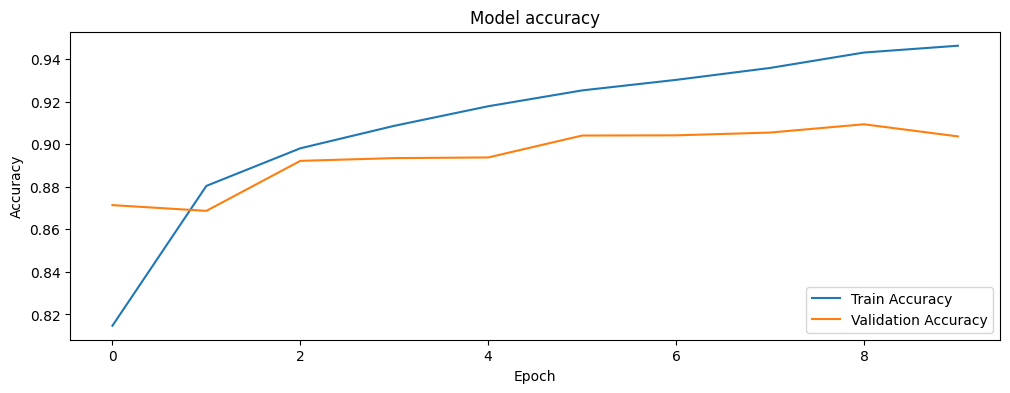

In [20]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
sns.lineplot(data=history.history['accuracy'], label='Train Accuracy')
sns.lineplot(data=history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

##### Single item of clothing prediction

Can rerun this code to output different predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


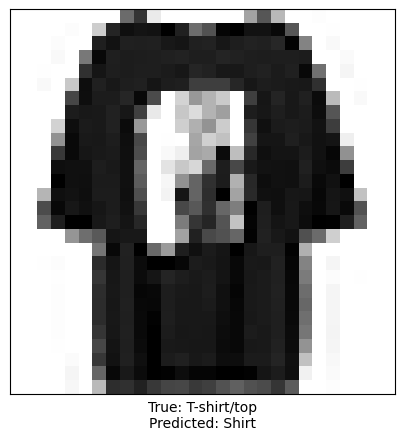

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Make predictions
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Select a random image from the validation set
i = np.random.randint(0, len(x_val))

# Plot the image
plt.figure(figsize=(5,5))
plt.imshow(x_val[i].reshape(28,28), cmap=plt.cm.binary)
plt.xlabel("True: " + class_names[y_val[i]] + "\nPredicted: " + class_names[y_pred_classes[i]])
plt.xticks([])
plt.yticks([])
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


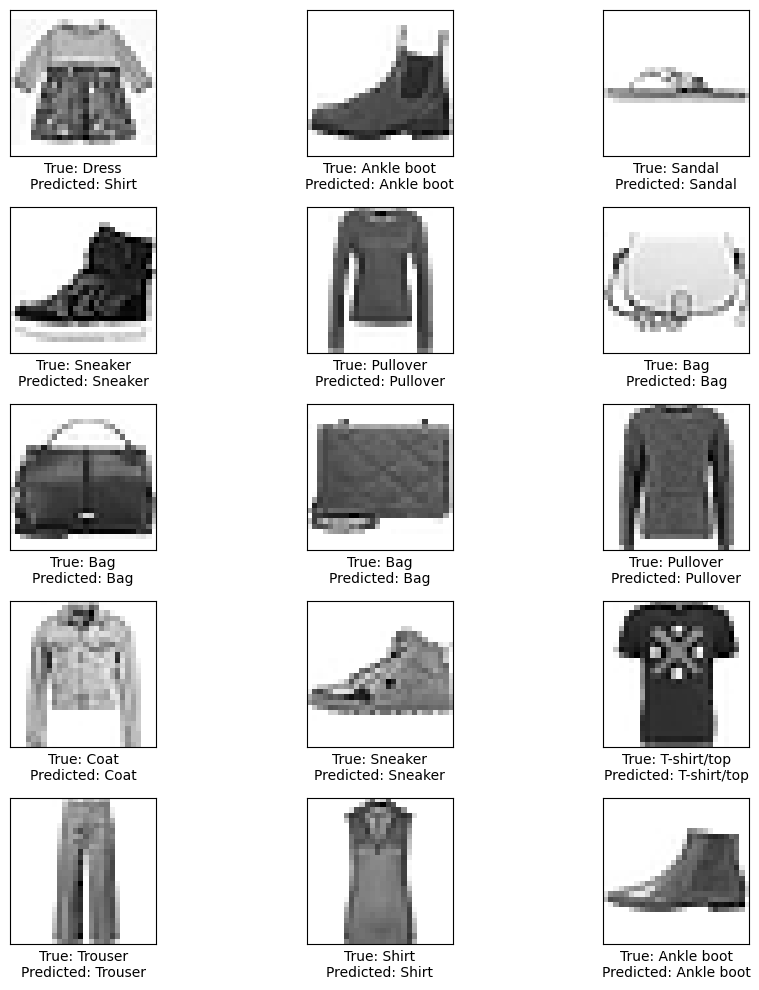

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Make predictions
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Select a random subset of images and labels from the validation set
indices = np.random.choice(np.arange(len(x_val)), size=15, replace=False)
x_subset = x_val[indices]
y_true_subset = y_val[indices]
y_pred_subset = y_pred_classes[indices]

# Plot the images in a grid
num_rows = 5
num_cols = 3
plt.figure(figsize=(10,10))
for i in range(num_rows*num_cols):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(x_subset[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel("True: " + class_names[y_true_subset[i]] + "\nPredicted: " + class_names[y_pred_subset[i]])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()
